In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

### CONNECTING TO MONGODB

In [1]:
!mongo --version

MongoDB shell version: 3.2.10


In [ ]:
!mongosh

In [1]:
from pyspark.sql import SparkSession

# Create Spark Session for MongoDB
spark = SparkSession.builder \
        .appName("DFToMongoDB") \
        .getOrCreate()

# # #
data = [("John", 28), ("Alice", 22), ("Bob", 32)]
columns = ["Name", "Age"]
df = spark.createDataFrame(data, columns)

In [2]:
df.show(3)

+-----+---+
| Name|Age|
+-----+---+
| John| 28|
|Alice| 22|
|  Bob| 32|
+-----+---+



In [3]:
# Configure MongoDB Database Connection
df.write.format("mongodb") \
    .option("uri","mongodb://127.0.0.1:27017/") \
    .option("database","sample_db") \
    .option("collection","scb") \
    .mode("append").save()

### CONNECTING TO MYSQL

In [2]:
!mysql --version

mysql  Ver 8.0.30-0ubuntu0.22.04.1 for Linux on x86_64 ((Ubuntu))


In [5]:
from pyspark.sql import SparkSession

# Create Spark Session for MySQL
spark = SparkSession.builder \
    .appName("DFToMySQL") \
    .getOrCreate()

# # #
data = [("John", 28), ("Alice", 22), ("Bob", 32)]
columns = ["Name", "Age"]
df = spark.createDataFrame(data, columns)

# Configure MySQL Database Connection
mysql_options = {
    "url": "jdbc:mysql://localhost:3306/sample",  # MySQL bağlantı URL'si
    "driver": "com.mysql.cj.jdbc.Driver",  # MySQL JDBC sürücüsü
    "dbtable": "yourtable",  # Hedef MySQL tablo adı
    "user": "root",  # MySQL kullanıcı adı
    "password": "password"  # MySQL parola
}

# DataFrame'i MySQL veritabanına yükleyin
df.write.format("jdbc").options(**mysql_options).mode("overwrite").save()

In [3]:
!pwd

/home/hduser/Desktop


In [4]:
!cat zahid.txt

pwd
cd Downloads/
nano zahid.txt
cat zahid.txt 
-----------------------------------------------
mysql -u root -p
Enter password: password
CREATE DATABASE sample;
USE sample;
SHOW TABLES;
-----------------------------------------------
Downloads$ ls mon*
Downloads$ sudo cp mon* /usr/local/spark/jars
Downloads$ sudo cp ./bson-3.12.12.jar /usr/local/spark/jars
Downloads$ ls mys*
Downloads$ sudo cp ./mysql-connector-j-8.0.33.jar /usr/local/spark/jars
--------------------------------------------------------------------------
cd /usr/local/spark/jars
/usr/local/spark/jars$ ls mon*
/usr/local/spark/jars$ ls mysql*
--------------------------------------------------------------------------
mongosh
/mongodb-linux-x86_64-ubuntu1604-3.2.10$ ./bin/mongod
--------------------------------------------------------------------------
https://repo1.maven.org/maven2/org/mongodb/mongodb-driver-sync/3.12.12/
--------------------------------------------------------------------------
mysql --version
mongo --ve

# ================================
# READ TO CSV FROM HDFS VIA SPARK
# ================================

In [1]:
from pyspark.sql import SparkSession

# Create Spark Session
spark = SparkSession.builder \
        .appName("HDFSToCSV") \
        .getOrCreate()

# Specify CSV file path throught HDFS
hdfs_file_path = "/ProjectTweets.csv"

# Read CSV file with Spark DataFrame
df = spark.read.csv(hdfs_file_path, header=False, inferSchema=True)

In [2]:
# Show DataFrame First 5 Rows
df.show(5)

+---+----------+--------------------+--------+---------------+--------------------+
|_c0|       _c1|                 _c2|     _c3|            _c4|                 _c5|
+---+----------+--------------------+--------+---------------+--------------------+
|  0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|  1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|  2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|  3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|  4|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
+---+----------+--------------------+--------+---------------+--------------------+
only showing top 5 rows



In [3]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: long (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)



In [2]:
# The first method for renamed the column names
df1 = df.withColumnRenamed("_c0", "id").withColumnRenamed("_c1", "stamp").withColumnRenamed("_c2", "date").withColumnRenamed("_c3", "flag").withColumnRenamed("_c4", "user").withColumnRenamed("_c5", "text")
df1.show(5)

+---+----------+--------------------+--------+---------------+--------------------+
| id|     stamp|                date|    flag|           user|                text|
+---+----------+--------------------+--------+---------------+--------------------+
|  0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|  1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|  2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|  3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|  4|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
+---+----------+--------------------+--------+---------------+--------------------+
only showing top 5 rows



In [3]:
# The second method for renamed the column names
df = df.selectExpr("_c0 as ID", "_c1 as STAMP", "_c2 as DATE", "_c3 as FLAG", "_c4 as USER", "_c5 as TEXT")
df.show(5)

+---+----------+--------------------+--------+---------------+--------------------+
| ID|     STAMP|                DATE|    FLAG|           USER|                TEXT|
+---+----------+--------------------+--------+---------------+--------------------+
|  0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|  1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|  2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|  3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|  4|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
+---+----------+--------------------+--------+---------------+--------------------+
only showing top 5 rows



In [6]:
# How many rows does the dataframe 
row_count = df.count()
# Print row_count
print("DataFrame has {} rows.".format(row_count))

DataFrame has 1600000 rows.


In [7]:
from pyspark.sql.functions import col

columns = ["ID", "STAMP", "DATE", "FLAG", "USER", "TEXT"]

Columns = df.columns

# Check out the each column and Count unique values
for column in Columns:
    unique_values = df.select(column).distinct()
    unique_count = unique_values.count()
    
    if unique_count > 0:
        print(f"{column} has {unique_count} unique values:")
    else:
        print(f"{column} has no unique value.")

ID has 1600000 unique values:


TIMESTAMP has 1598315 unique values:


DATE has 774363 unique values:


FLAG has 1 unique values:


USER has 659775 unique values:


TEXT has 1581466 unique values:


In [8]:
from pyspark.sql.functions import col

columns = ["ID", "STAMP", "DATE", "FLAG", "USER", "TEXT"]

Columns = df.columns

# Check out the each column and Count duplicate values
for column in Columns:
    count_df = df.groupBy(column).count()
    duplicate_values = count_df.filter(col("count") > 1).count()
    
    if duplicate_values > 0:
        print(f"{column} has {duplicate_values} duplicate values.")
    else:
        print(f"{column} has no duplicate value.")

ID has no duplicate value.


TIMESTAMP has 1685 duplicate values.


DATE has 373151 duplicate values.


FLAG has 1 duplicate values.


USER has 254498 duplicate values.


TEXT has 8434 duplicate values.


In [4]:
# Drop the selected columns
df = df.drop("STAMP", "FLAG", "USER")
df.show(5)

+---+--------------------+--------------------+
| ID|                DATE|                TEXT|
+---+--------------------+--------------------+
|  0|Mon Apr 06 22:19:...|@switchfoot http:...|
|  1|Mon Apr 06 22:19:...|is upset that he ...|
|  2|Mon Apr 06 22:19:...|@Kenichan I dived...|
|  3|Mon Apr 06 22:19:...|my whole body fee...|
|  4|Mon Apr 06 22:19:...|@nationwideclass ...|
+---+--------------------+--------------------+
only showing top 5 rows



In [10]:
df.describe().show()

+-------+------------------+--------------------+--------------------+--------------------+
|summary|                ID|                DATE|                USER|                TEXT|
+-------+------------------+--------------------+--------------------+--------------------+
|  count|           1600000|             1600000|             1600000|             1600000|
|   mean|          799999.5|                null| 4.325887521835714E9|                null|
| stddev|461880.35968924535|                null|5.162733218454889E10|                null|
|    min|                 0|Fri Apr 17 20:30:...|        000catnap000|                 ...|
|    max|           1599999|Wed May 27 07:27:...|          zzzzeus111|ï¿½ï¿½ï¿½ï¿½ï¿½ß§...|
+-------+------------------+--------------------+--------------------+--------------------+



In [11]:
df.summary().show()

+-------+------------------+--------------------+--------------------+--------------------+
|summary|                ID|                DATE|                USER|                TEXT|
+-------+------------------+--------------------+--------------------+--------------------+
|  count|           1600000|             1600000|             1600000|             1600000|
|   mean|          799999.5|                null| 4.325887521835714E9|                null|
| stddev|461880.35968924535|                null|5.162733218454889E10|                null|
|    min|                 0|Fri Apr 17 20:30:...|        000catnap000|                 ...|
|    25%|            399999|                null|             32508.0|                null|
|    50%|            799999|                null|            130587.0|                null|
|    75%|           1200076|                null|           1100101.0|                null|
|    max|           1599999|Wed May 27 07:27:...|          zzzzeus111|ï¿½ï¿½ï¿½ï

In [12]:
from pyspark.sql.functions import col

# Do a grouping and counting operation to find duplicate values in the "TEXT" column
count_df = df.groupBy("TEXT").count()

# Filter rows containing duplicate values
duplicate_values = count_df.filter(col("count") > 1)

# If there are duplicate values, show them
if duplicate_values.count() > 0:
    print("Duplicate values:")
    duplicate_values.show(truncate=False)  # Display column values in full length
else:
    print("No duplicate values found.")

Duplicate values:


+----------------------------------------------------------------------------------------------------------------------------------------+-----+
|TEXT                                                                                                                                    |count|
+----------------------------------------------------------------------------------------------------------------------------------------+-----+
|is poorly sick                                                                                                                          |4    |
|This little tree is tiiiiired  25's (and dealing with stupid people) tomorrow and then finishing 10s monday! Raiding every nice         |2    |
|at home with a cold                                                                                                                     |2    |
|Hangover.                                                                                                                        

In [14]:
# How many rows does the dataframe 
row_count = df.count()
# Print row_count
print("DataFrame has {} rows.".format(row_count))

DataFrame has 1600000 rows.


In [16]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- DATE: string (nullable = true)
 |-- USER: string (nullable = true)
 |-- TEXT: string (nullable = true)



# ====================
# TEXT PRE-PROCESSING
# ====================

standard pre-processing techniques:

- Lower casing the corpus 
- Removing the punctuation 
- Removing the stopwords 
- Tokenizing the corpus 
- Stemming and Lemmatization
- Word embeddings using CountVectorizer and TF-IDF  

In [9]:
text_df = df.select("TEXT")
text_df.show(3, truncate=False)

+-------------------------------------------------------------------------------------------------------------------+
|TEXT                                                                                                               |
+-------------------------------------------------------------------------------------------------------------------+
|@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D|
|is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!    |
|@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds                          |
+-------------------------------------------------------------------------------------------------------------------+
only showing top 3 rows



In [8]:
from pyspark.sql.functions import col, udf, lower, regexp_replace
from pyspark.sql.types import ArrayType, StringType

import string
import nltk
import re
import contractions
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer


from transformers import BertTokenizer, BertForSequenceClassification
import torch


#### TEXT CLEANING

In [10]:
import re

# Cleaning Function
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = text.lower()
    return text

# Save as UDF
clean_text_udf = udf(clean_text, StringType())

# Create new column
text_df = text_df.withColumn("TEXT_C1", clean_text_udf(col("text")))
text_df.show(3, truncate=False)

+-------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------+
|TEXT                                                                                                               |TEXT_C1                                                                                                        |
+-------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------+
|@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D|  - a that's a bummer.  you shoulda got david carr of third day to do it. ;d                                   |
|is upset that he can't update his Facebook by texting it... and might cry as a 

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/daemon.py", line 186, in manager
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/daemon.py", line 74, in worker
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 643, in main
    if read_int(infile) == SpecialLengths.END_OF_STREAM:
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 564, in read_int
    raise EOFError
EOFError


#### EXPAND CONTRACTIONS

In [11]:
import contractions

# Function to expand contractions
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

# Save as UDF
expand_contractions_udf = udf(expand_contractions, StringType())

# Use the UDF and Create new column
text_df = text_df.withColumn("TEXT_C2", expand_contractions_udf(col("TEXT_C1")))

# Show the dataframe
text_df.show(3, truncate=False)

+-------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------+
|TEXT                                                                                                               |TEXT_C1                                                                                                        |TEXT_C2                                                                                                         |
+-------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------

#### CLEAN THE PUNCTUATION CHARACTERS

In [12]:
# Define punctuation characters
punctuation_characters = r'[!\"#\$%&\'\(\)\*\+,\-./:;<=>\?@[\\]\^_`{|}~]'

# Remove punctuation characters
text_df = text_df.withColumn("TEXT_C3", regexp_replace(col("TEXT_C2"), punctuation_characters, ""))

# Show the dataframe
text_df.show(3, truncate=False)

+-------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------+
|TEXT                                                                                                               |TEXT_C1                                                                                                        |TEXT_C2                                                                                                         |TEXT_C3                                                                                                    |
+-------------------------------------------------------------------------------------------------

#### CLEAN THE STOPWORDS

In [13]:
# Download "stopwords" from nltk dictionary
nltk.download("stopwords")

# Configure the language as english
stop_words = set(stopwords.words("english"))

# Define the udf 
remove_stopwords_udf = udf(lambda text: " ".join([word for word in text.split() if word not in stop_words]), StringType())

# Use the UDF in order to remove stopwords and Create new column
text_df = text_df.withColumn("TEXT_C4", remove_stopwords_udf(col("TEXT_C3")))

# Show the dataframe
text_df.show(3, truncate=False)

[nltk_data] Downloading package stopwords to /home/hduser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


+-------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------+
|TEXT                                                                                                               |TEXT_C1                                                                                                        |TEXT_C2                                                                                                         |TEXT_C3                                                                                                    |TEXT_C4               

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/daemon.py", line 186, in manager
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/daemon.py", line 74, in worker
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 643, in main
    if read_int(infile) == SpecialLengths.END_OF_STREAM:
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 564, in read_int
    raise EOFError
EOFError


#### IMPLEMENT LEMMATIZATION

In [14]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download 'punkt','averaged_perceptron_tagger','wordnet' from nltk dictionary
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Defining the function that implements the Lemmatization operation as a UDF
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    words = word_tokenize(text)
    for w in words:
        lemma = lemmatizer.lemmatize(w)
        lemmatized_sentence.append(lemma)
    lemmatized_text = " ".join(lemmatized_sentence)
    return lemmatized_text

# Define the UDF
lemmatize_text_udf = udf(lemmatize_text, StringType())

# Use the UDF and Create new column
text_df = text_df.withColumn("TEXT_C5", lemmatize_text_udf(text_df["TEXT_C4"]))

# Show the dataframe
text_df.show(3, truncate=False)

[nltk_data] Downloading package punkt to /home/hduser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/hduser/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/hduser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


+-------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------+-----------------------------------------------------------------------------+
|TEXT                                                                                                               |TEXT_C1                                                                                                        |TEXT_C2                                                                                                         |TEXT_C3                                             

#### IMPLEMENT STEMMING

In [15]:
from nltk.stem import SnowballStemmer

# Defining the function that finds word roots as UDF 
def stem_text(text):
    snow = SnowballStemmer('english')
    stemmed_sentence = []
    words = word_tokenize(text)
    for w in words:
        stemmed_sentence.append(snow.stem(w))
    stemmed_text = " ".join(stemmed_sentence)
    return stemmed_text

# Define the UDF
stem_text_udf = udf(stem_text, StringType())

# Use the UDF and Create new column
text_df = text_df.withColumn("TEXT_C6", stem_text_udf(text_df["TEXT_C5"]))

# Show the dataframe
text_df.show(3, truncate=False)

+-------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------+-----------------------------------------------------------------------------+-------------------------------------------------------------------------+
|TEXT                                                                                                               |TEXT_C1                                                                                                        |TEXT_C2                                                                                    

#### IMPLEMENT TOKENIZATION

In [16]:
from pyspark.sql.types import ArrayType, StringType
from nltk.tokenize import word_tokenize

# Function that splits text into tokens using NLTK
def tokenize_text(text):
    words = word_tokenize(text)
    return words

# Define the UDF
tokenize_text_udf = udf(tokenize_text, ArrayType(StringType()))

# Use the UDF and Create new column
text_df = text_df.withColumn("tokens", tokenize_text_udf(text_df["TEXT_C6"]))

# Show the selected dataframe
text_df.select("TEXT_C6", "tokens").show(3, truncate=False)

+-------------------------------------------------------------------------+---------------------------------------------------------------------------------------+
|TEXT_C6                                                                  |tokens                                                                                 |
+-------------------------------------------------------------------------+---------------------------------------------------------------------------------------+
|bummer shoulda got david carr third day                                  |[bummer, shoulda, got, david, carr, third, day]                                        |
|upset can not updat facebook text might cri result school today also blah|[upset, can, not, updat, facebook, text, might, cri, result, school, today, also, blah]|
|dive mani time ball manag save 50 rest go bound                          |[dive, mani, time, ball, manag, save, 50, rest, go, bound]                             |
+---------------

# DUUUUUUUUUUUUR

In [21]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# BERT tokenizer'ı yükle
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# BERT modelini yükle
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")

# Modeli değerlendirme modunda kullanın
model.eval()

# UDF olarak duygu analizi yapacak fonksiyonu tanımlayın
def analyze_sentiment(tokens):
    # Tokenleri birleştirerek metin oluşturun
    text = " ".join(tokens)

    # Metni BERT için girişe dönüştürün
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Modeli kullanarak duygu analizi yapın
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    # Sonuçları pozitif, negatif ve nötr olarak etiketleyin
    sentiment_labels = ["Negatif", "Nötr", "Pozitif"]
    predicted_label = sentiment_labels[torch.argmax(logits, dim=1)]

    return predicted_label

# UDF'yi tanımlayın
analyze_sentiment_udf = udf(analyze_sentiment, StringType())

# DataFrame'deki "tokens" sütununu kullanarak duygu analizi yapın ve sonuçları yeni bir sütuna ekleyin
text_df = text_df.withColumn("sentiment_result", analyze_sentiment_udf(text_df["tokens"]))

# Sonuçları görüntüleyin
text_df.select("tokens", "sentiment_result").show(3, truncate=False)


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


AttributeError: 'FloatProgress' object has no attribute 'style'

#### IMPLEMENT TOKENIZATION AND SPLIT WORDS TO ROWS

In [17]:
from pyspark.ml.feature import Tokenizer
from pyspark.sql.functions import explode, col

# Create The Tokenizer
tokenizer = Tokenizer(inputCol="TEXT_C6", outputCol="words")
tokenizer_df = tokenizer.transform(text_df)

# Separate words into individual lines
tokenizer_df = tokenizer_df.select(explode(col("words")).alias("word"))

# Show the dataframe
tokenizer_df.show(10, truncate=False)

+--------+------+
|    word| count|
+--------+------+
|      go|166488|
|     get|109960|
|     day|101499|
|    good| 90628|
|    work| 85203|
|    love| 83655|
|    like| 82963|
|    want| 73526|
|     got| 70043|
|   today| 66095|
|     can| 65259|
|     not| 65157|
|    time| 64404|
|   thank| 60670|
|    know| 58230|
|    miss| 56620|
|    back| 56401|
|     one| 55913|
|     lol| 55388|
|     see| 50987|
|    feel| 50657|
|   think| 50627|
|  realli| 50057|
|    hope| 43743|
|   night| 43285|
|   watch| 43119|
|    need| 42906|
|   still| 42852|
|   would| 42612|
|    make| 42553|
|     new| 42001|
|    well| 41074|
|     amp| 40710|
|    home| 39492|
|    look| 39094|
|    come| 38618|
|      oh| 38017|
|       2| 37968|
|    much| 36633|
|    last| 35765|
| twitter| 34450|
|tomorrow| 34440|
|    morn| 34264|
|    wish| 33231|
|   great| 33168|
|    wait| 31988|
|     sad| 31542|
|   sleep| 31221|
|  though| 31015|
|    haha| 30350|
+--------+------+
only showing top 50 rows



#### COUNT THE TOKENIZER WORDS

In [ ]:
# Count the tokenizer words
tokenizer_df_count = tokenizer_df.groupBy("word").count().orderBy("count", ascending=False)

# Show the dataframe
tokenizer_df_count.show(50)

#### SENTIMENT LABEL ( POSITIVE - NEGATIVE - NEUTRAL )

In [21]:
from textblob import TextBlob

# Sentimental Analysis Function
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Sentiment Label Function
def label_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'


from pyspark.sql.types import FloatType, StringType

sentiment_udf = udf(get_sentiment, FloatType())
label_udf = udf(label_sentiment, StringType())

text_df = text_df.withColumn('sentiment_score', sentiment_udf(text_df['TEXT_C6']))
text_df = text_df.withColumn('sentiment_label', label_udf(text_df['sentiment_score']))

# Etiket dağılımını göster
text_df.groupBy('sentiment_label').count().show()`


+---------------+------+
|sentiment_label| count|
+---------------+------+
|       positive|582066|
|        neutral|782520|
|       negative|235414|
+---------------+------+



In [23]:
# Toplam yorum sayısı
total_count = text_df.count()

# Pozitif, Negatif ve Nötr yorum sayıları
positive_count = text_df.filter(text_df.sentiment_label == "positive").count()
neutral_count = text_df.filter(text_df.sentiment_label == "neutral").count()
negative_count = text_df.filter(text_df.sentiment_label == "negative").count()

# Başarı oranını hesaplama (bu durumda, etiket dağılımının yüzdesini göstermektedir)
positive_rate = (positive_count / total_count) * 100
neutral_rate = (neutral_count / total_count) * 100
negative_rate = (negative_count / total_count) * 100

print(f"Positive rate: {positive_rate}%")
print(f"Neutral rate: {neutral_rate}%")
print(f"Negative rate: {negative_rate}%")

Pozitif Yorum Oranı: 36.379125%
Nötr Yorum Oranı: 48.9075%
Negatif Yorum Oranı: 14.713375000000001%


In [39]:
from pyspark.sql.functions import when, col

# Duygu etiketlerini yeni bir sütunda saklama
text_df = text_df.withColumn("sentiment_label_column", 
    when(text_df["sentiment_label"] == "positive", "positive")
    .when(text_df["sentiment_label"] == "neutral", "neutral")
    .when(text_df["sentiment_label"] == "negative", "negative")
    .otherwise("unknown")  # Eğer başka bir etiket varsa "unknown" olarak işaretle
)

# Yeni sütunu göster
text_df.select("TEXT_C6", "sentiment_label_column").show(truncate=False)

+-------------------------------------------------------------------------+----------------------+
|TEXT_C6                                                                  |sentiment_label_column|
+-------------------------------------------------------------------------+----------------------+
|bummer shoulda got david carr third day                                  |neutral               |
|upset can not updat facebook text might cri result school today also blah|neutral               |
|dive mani time ball manag save 50 rest go bound                          |neutral               |
|whole bodi feel itchi like fire                                          |positive              |
|behav mad can not see                                                    |negative              |
|whole crew                                                               |positive              |
|need hug                                                                 |neutral               |
|hey long 

In [38]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
from textblob import TextBlob

# Polarite ölçümünü yapacak fonksiyon
def get_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# UDF tanımla
polarity_udf = udf(get_polarity, FloatType())

# 'TEXT' sütunundaki her metin için polarite skoru hesapla ve yeni bir sütuna ekle
text_df = text_df.withColumn("polarity_score", polarity_udf(text_df['TEXT_C6']))

# Yeni sütunu göster
text_df.select("TEXT_C6", "polarity_score").show(truncate=False)


+-------------------------------------------------------------------------+--------------+
|TEXT_C6                                                                  |polarity_score|
+-------------------------------------------------------------------------+--------------+
|bummer shoulda got david carr third day                                  |0.0           |
|upset can not updat facebook text might cri result school today also blah|0.0           |
|dive mani time ball manag save 50 rest go bound                          |0.0           |
|whole bodi feel itchi like fire                                          |0.2           |
|behav mad can not see                                                    |-0.625        |
|whole crew                                                               |0.2           |
|need hug                                                                 |0.0           |
|hey long time see yes rain bit bit lol fine thank                        |0.3888889     |

# ====================
# TIME SERIES ANALYSIS
# ====================

In [5]:
# Select the DATE column
date_df = df.select("DATE")

# Show the DATE column
date_df.show(truncate=False)

+----------------------------+
|DATE                        |
+----------------------------+
|Mon Apr 06 22:19:45 PDT 2009|
|Mon Apr 06 22:19:49 PDT 2009|
|Mon Apr 06 22:19:53 PDT 2009|
|Mon Apr 06 22:19:57 PDT 2009|
|Mon Apr 06 22:19:57 PDT 2009|
|Mon Apr 06 22:20:00 PDT 2009|
|Mon Apr 06 22:20:03 PDT 2009|
|Mon Apr 06 22:20:03 PDT 2009|
|Mon Apr 06 22:20:05 PDT 2009|
|Mon Apr 06 22:20:09 PDT 2009|
|Mon Apr 06 22:20:16 PDT 2009|
|Mon Apr 06 22:20:17 PDT 2009|
|Mon Apr 06 22:20:19 PDT 2009|
|Mon Apr 06 22:20:19 PDT 2009|
|Mon Apr 06 22:20:20 PDT 2009|
|Mon Apr 06 22:20:20 PDT 2009|
|Mon Apr 06 22:20:22 PDT 2009|
|Mon Apr 06 22:20:25 PDT 2009|
|Mon Apr 06 22:20:31 PDT 2009|
|Mon Apr 06 22:20:34 PDT 2009|
+----------------------------+
only showing top 20 rows



In [6]:
# Show the schema of the dataframe
date_df.printSchema()

root
 |-- DATE: string (nullable = true)



In [7]:
spark.conf.set("spark.sql.legacy.timeParserPolicy", "Legacy")

from pyspark.sql.functions import to_timestamp

timestamp = to_timestamp("Mon Apr 06 22:19:45 PDT 2009", "EEE MMM dd HH:mm:ss Z yyyy")

In [8]:
from pyspark.sql import functions as F
from pyspark.sql.types import TimestampType

date_df = date_df.withColumn("TIMESTAMP", F.to_timestamp(date_df["DATE"], "EEE MMM dd HH:mm:ss Z yyyy"))

date_df = date_df.withColumn("TIMESTAMP", F.col("TIMESTAMP").cast(TimestampType()))

date_df.show(5, truncate=False)

+----------------------------+-------------------+
|DATE                        |TIMESTAMP          |
+----------------------------+-------------------+
|Mon Apr 06 22:19:45 PDT 2009|2009-04-07 06:19:45|
|Mon Apr 06 22:19:49 PDT 2009|2009-04-07 06:19:49|
|Mon Apr 06 22:19:53 PDT 2009|2009-04-07 06:19:53|
|Mon Apr 06 22:19:57 PDT 2009|2009-04-07 06:19:57|
|Mon Apr 06 22:19:57 PDT 2009|2009-04-07 06:19:57|
+----------------------------+-------------------+
only showing top 5 rows



In [9]:
# Sort ascending via TIMESTAMP column
date_df = date_df.orderBy("TIMESTAMP", ascending=True)

# Show sorted DataFrame
date_df.show(truncate=False)

+----------------------------+-------------------+
|DATE                        |TIMESTAMP          |
+----------------------------+-------------------+
|Mon Apr 06 22:19:45 PDT 2009|2009-04-07 06:19:45|
|Mon Apr 06 22:19:49 PDT 2009|2009-04-07 06:19:49|
|Mon Apr 06 22:19:53 PDT 2009|2009-04-07 06:19:53|
|Mon Apr 06 22:19:57 PDT 2009|2009-04-07 06:19:57|
|Mon Apr 06 22:19:57 PDT 2009|2009-04-07 06:19:57|
|Mon Apr 06 22:20:00 PDT 2009|2009-04-07 06:20:00|
|Mon Apr 06 22:20:03 PDT 2009|2009-04-07 06:20:03|
|Mon Apr 06 22:20:03 PDT 2009|2009-04-07 06:20:03|
|Mon Apr 06 22:20:05 PDT 2009|2009-04-07 06:20:05|
|Mon Apr 06 22:20:09 PDT 2009|2009-04-07 06:20:09|
|Mon Apr 06 22:20:16 PDT 2009|2009-04-07 06:20:16|
|Mon Apr 06 22:20:17 PDT 2009|2009-04-07 06:20:17|
|Mon Apr 06 22:20:19 PDT 2009|2009-04-07 06:20:19|
|Mon Apr 06 22:20:19 PDT 2009|2009-04-07 06:20:19|
|Mon Apr 06 22:20:20 PDT 2009|2009-04-07 06:20:20|
|Mon Apr 06 22:20:20 PDT 2009|2009-04-07 06:20:20|
|Mon Apr 06 22:20:22 PDT 2009|2

In [10]:
# Select THE OLDEST DATE and THE NEWEST DATE
oldest_date = date_df.select("TIMESTAMP").first()[0]
newest_date = date_df.select("TIMESTAMP").collect()[-1][0]

# Print THE OLDEST DATE and THE NEWEST DATE
print("THE OLDEST DATE:", oldest_date)
print("THE NEWEST DATE:", newest_date)

THE OLDEST DATE: 2009-04-07 06:19:45
THE NEWEST DATE: 2009-06-25 18:28:31


+-------+------+
|   week| count|
+-------+------+
|2009-15| 20671|
|2009-16| 16132|
|2009-17| 63222|
|2009-18| 31096|
|2009-19| 54868|
|2009-20| 63480|
|2009-21|126975|
|2009-22|171821|
|2009-23|483375|
|2009-24|135447|
|2009-25|345196|
|2009-26| 87717|
+-------+------+



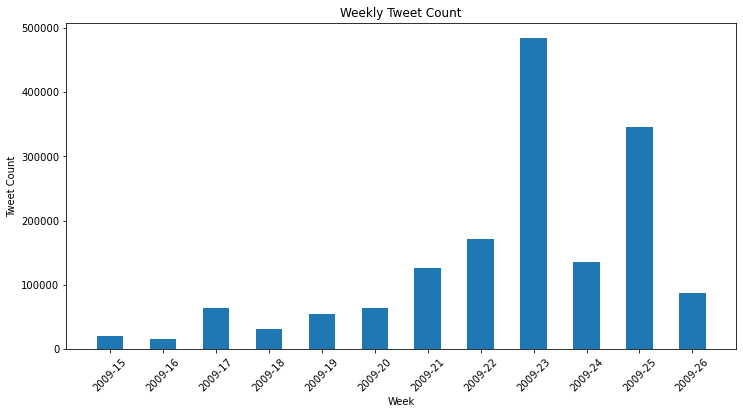

In [12]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import date_format

# 1-Week Analysis
weekly_data = date_df.groupBy(date_format("TIMESTAMP", "yyyy-ww")).count()
weekly_data = weekly_data.withColumnRenamed("date_format(TIMESTAMP, yyyy-ww)", "week")
weekly_data = weekly_data.orderBy("week", ascending=True)
weekly_data.show()

# Get the result and visualize it
weekly_data_pd = weekly_data.toPandas()

# Plot for 1-Week Time Series
plt.figure(figsize=(12, 6))
plt.bar(weekly_data_pd["week"], weekly_data_pd["count"], width=0.5)
plt.title("Weekly Tweet Count")
plt.xlabel("Week")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.show()

+-------+------+
|  month| count|
+-------+------+
|2009-05|554060|
|2009-04|100025|
|2009-06|945915|
+-------+------+



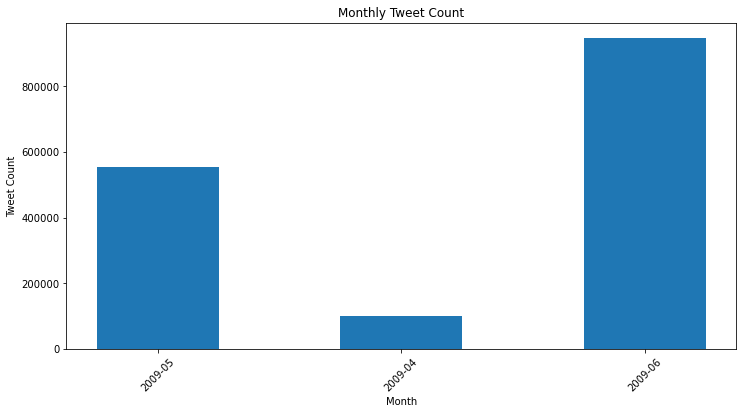

In [13]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import date_format

# 1-Month Analysis
monthly_data = date_df.groupBy(date_format("TIMESTAMP", "yyyy-MM")).count()
monthly_data = monthly_data.withColumnRenamed("date_format(TIMESTAMP, yyyy-MM)", "month")
monthly_data.show()

# Get the results and visualize it
monthly_data_pd = monthly_data.toPandas()

# Plot for 1-Month Time Series
plt.figure(figsize=(12, 6))
plt.bar(monthly_data_pd["month"], monthly_data_pd["count"], width=0.5)
plt.title("Monthly Tweet Count")
plt.xlabel("Month")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.show()

+-------+------+
|quarter| count|
+-------+------+
|2009-05|554060|
|2009-04|100025|
|2009-06|945915|
+-------+------+



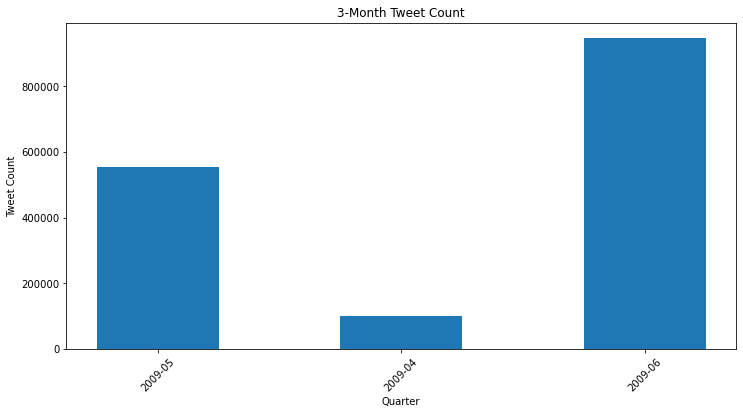

In [14]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import date_format

# 3-Month Analysis
quarterly_data = date_df.groupBy(date_format("TIMESTAMP", "yyyy-MM")).count()
quarterly_data = quarterly_data.withColumnRenamed("date_format(TIMESTAMP, yyyy-MM)", "quarter")
quarterly_data.show()

# Get the results and visualize it
quarterly_data_pd = quarterly_data.toPandas()

# Plot for 3-Month Time Series
plt.figure(figsize=(12, 6))
plt.bar(quarterly_data_pd["quarter"], quarterly_data_pd["count"], width=0.5)
plt.title("3-Month Tweet Count")
plt.xlabel("Quarter")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.show()